
## Programming Assignment 1 and 2
### 111 Computational Physics Lab  
  >Author: Yuan-Yen Peng 108000204  
  >Email: garyphys0915@gapp.nthu.edu.com  
  >Date: Nov. 11, 2022  
  >LINCENCE: MIT

#### 1. Damped oscillator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysolver as solver

In [2]:
def oscillator(y,t, lam, K, M):
        '''
        This is the function (osci) defined in the [position, velocity] 
        and [derivative(position), derivative(velocity)]
        :param y: [position, velocity]
        :param t: time (time varying)
        :param lam: \lambda ==> damping constant
        :param K: spring constants
        :param M: mass constant
        '''
        yder =  np.zeros(2)
        yder[0] = y[1]
        yder[1] = -y[0] * K/M - y[1] * lam / M # the difinition of the acceleration, omghich is depend on the position.
        
        return yder

In [3]:
def plot(u1, u2, u3, w1, w2, w3, num):
  '''
  This is the plotting function
  :param ui: u is the specified polared unit for x-axis. (i = 1, 2, 3) ==> (Euler, RK2, RK4)
  :param wi: w is the specified polared unit for y-axis. (i = 1, 2, 3) ==> (Euler, RK2, RK4)
  '''
  plt.plot(u1, w1, "r", alpha = 0.3, label = "Euler")
  plt.plot(u2, w2, "g", alpha = 0.3, label = "RK2")
  plt.plot(u3, w3, "b", alpha = 0.3, label = "RK4")
  plt.axis("equal")
  plt.title(f"Damped ({num})")
  plt.xlabel("$\omega\quad [rad*s^{-1}]$")
  plt.ylabel("$u\quad [cm*rad*s^{-1}]$")
  plt.legend(loc = "best")
  plt.show()

In [4]:
def xt(t_eval, sol1, sol2, sol3, sub):
  plt.plot(t_eval, sol1, "r", label = "Euler", alpha = 0.3)
  plt.plot(t_eval, sol2, "g", label = "RK2", alpha = 0.3)
  plt.plot(t_eval, sol3, "b", label = "RK4", alpha = 0.3)
  plt.title(f"Damped x-t ({sub})")
  plt.xlabel("t [s]")
  plt.ylabel("x [cm]")
  plt.legend()
  plt.show()

In [5]:
def et(t_eval, sol1, sol2, sol3, sub):
  plt.plot(t_eval, sol1, "r", label = "Euler", alpha = 0.3)
  plt.plot(t_eval, sol2, "g", label = "RK2", alpha = 0.3)
  plt.plot(t_eval, sol3, "b", label = "RK4", alpha = 0.3)
  plt.title(f"Damped E-t ({sub})")
  plt.xlabel("t [s]")
  plt.ylabel("E [J]")
  plt.legend()
  plt.show()

In [6]:
def rate(t_eval, sol1, sol2, sol3, sub):
  plt.plot(t_eval, sol1, "r", label = "Euler", alpha = 0.3)
  plt.plot(t_eval, sol2, "g", label = "RK2", alpha = 0.3)
  plt.plot(t_eval, sol3, "b", label = "RK4", alpha = 0.3)
  plt.title(f"Damped Energy Difference ({sub})")
  plt.xlabel("t [s]")
  plt.ylabel("Diff (%)")
  plt.legend()
  plt.show()

(a) $A = 1 [cm],\quad \omega_0 = 1 [rads^{-1}],\quad \gamma = 0.2 [s^{-1}], \quad \phi = -\pi / 2 [rad]$

In [7]:
# Setting parameters
N, t = 100, 20
dt = t/N

M, K = 1, 1
A = 1 # initial amplitude
r  = 0.2 # \gamma
lam = 2 * M * r # \lamda
phi = - np.pi/2
omg0 = np.sqrt(K/M)
omg1 = np.sqrt(abs(np.square(omg0) - np.square(r)))

y0  = np.zeros(2)
y0[0]= 0 # initial position
y0[1] = - A * r * np.cos(phi) - A * omg1 * np.sin(phi) # initial velocity

t_eval = np.linspace(0, t, N) # from 0 to t divided by N+1, i.e., N+1 equal parts.

In [8]:
# position
sol1 = solver.solve_ivp(oscillator, y0, t, dt, N, method="Euler", args=(lam, K, M))[0]
sol2 = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK2", args=(lam, K, M))[0]
sol3 = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK4", args=(lam, K, M))[0]

# velocity
sol1_v = solver.solve_ivp(oscillator, y0, t, dt, N, method="Euler", args=(lam, K, M))[1]
sol2_v = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK2", args=(lam, K, M))[1]
sol3_v = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK4", args=(lam, K, M))[1]

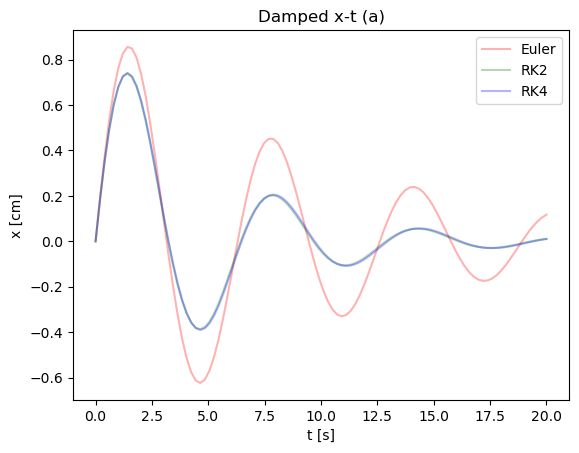

In [9]:
# Visualize
xt(t_eval, sol1, sol2, sol3, "a")

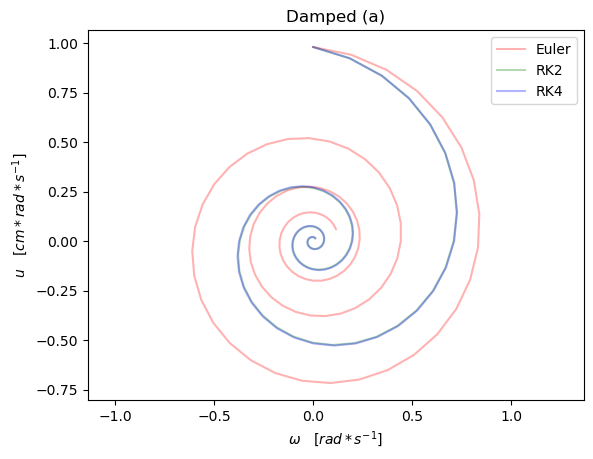

In [10]:
# polar coordinates
u1 = omg1 * sol1
u2 = omg1 * sol2
u3 = omg1 * sol3

w1 = r * sol1 + sol1_v
w2 = r * sol2 + sol2_v
w3 = r * sol3 + sol3_v

# plot it!
plot(u1, u2, u3, w1, w2, w3, "a")

#### 2. Total energy and the energy loss

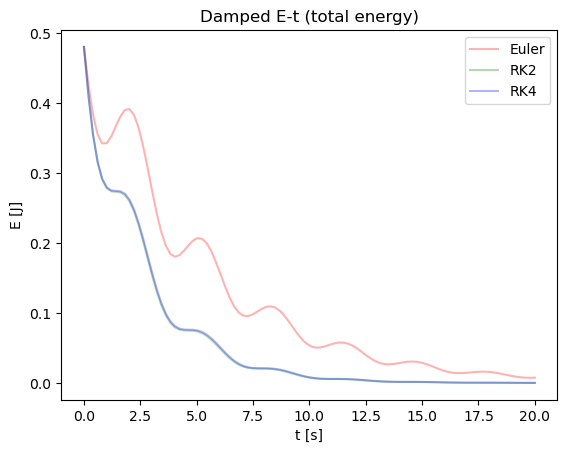

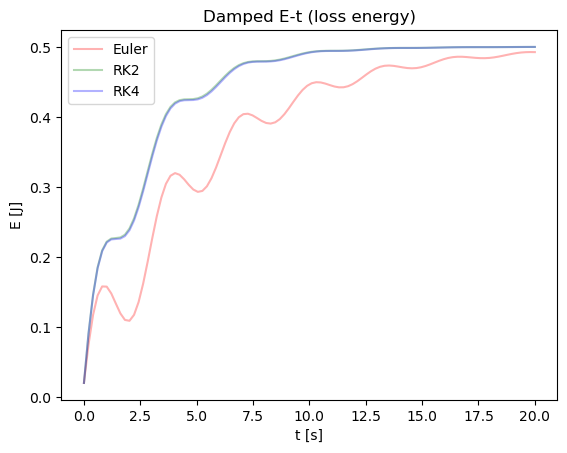

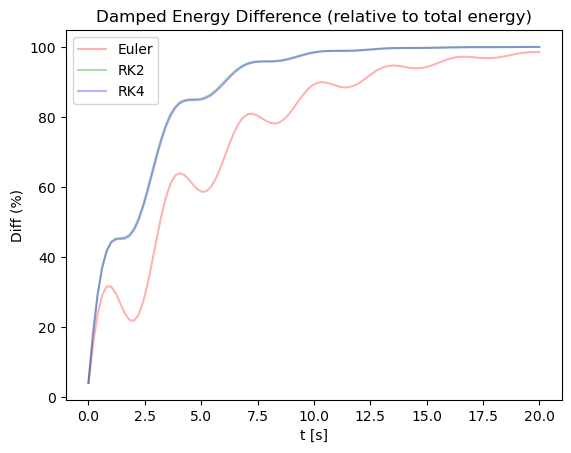

In [11]:
# kenetical energy
K1 = 0.5 * M * np.square(sol1)
K2 = 0.5 * M * np.square(sol2)
K3 = 0.5 * M * np.square(sol3)

# potential energy
U1 = 0.5 * K * np.square(sol1_v)
U2 = 0.5 * K * np.square(sol2_v)
U3 = 0.5 * K * np.square(sol3_v)

# total energy
tot1 = K1 + U1
tot2 = K2 + U2
tot3 = K3 + U3

# energy loss
no_loss = 0.5 * K * np.square(A)
loss1 = no_loss - tot1
loss2 = no_loss - tot2
loss3 = no_loss - tot3

# rate of energy loss
rate1 = (loss1 / no_loss) * 100
rate2 = (loss2 / no_loss) * 100
rate3 = (loss3 / no_loss) * 100

# plot them!
et(t_eval, tot1, tot2, tot3, "total energy")
et(t_eval, loss1, loss2, loss3, "loss energy")
rate(t_eval, rate1, rate2, rate3, "relative to total energy")


### 1. (conti)
(b) $A = 1 [cm],\quad \omega_0 = 1 [rads^{-1}],\quad \gamma = 1.0 [s^{-1}], \quad \phi = -\pi / 2 [rad]$

In [12]:
# update the parameter \gamma
# Setting parameters
N, t = 100, 20
dt = t/N

M, K = 1, 1
A = 1 # initial amplitude
r  = 1.0 # \gamma
lam = 2 * M * r # \lamda
phi = - np.pi/2
omg0 = np.sqrt(K/M)
omg1 = np.sqrt(abs(np.square(omg0) - np.square(r)))

y0  = np.zeros(2)
y0[0]= 10e-5 # initial position (use tolerence = 10e-5)
y0[1] = - A * r * np.cos(phi) - A * omg1 * np.sin(phi) # initial velocity

t_eval = np.linspace(0, t, N) # from 0 to t divided by N+1, i.e., N+1 equal parts.

In [13]:
# position
sol1 = solver.solve_ivp(oscillator, y0, t, dt, N, method="Euler", args=(lam, K, M))[0]
sol2 = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK2", args=(lam, K, M))[0]
sol3 = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK4", args=(lam, K, M))[0]

# velocity
sol1_v = solver.solve_ivp(oscillator, y0, t, dt, N, method="Euler", args=(lam, K, M))[1]
sol2_v = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK2", args=(lam, K, M))[1]
sol3_v = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK4", args=(lam, K, M))[1]

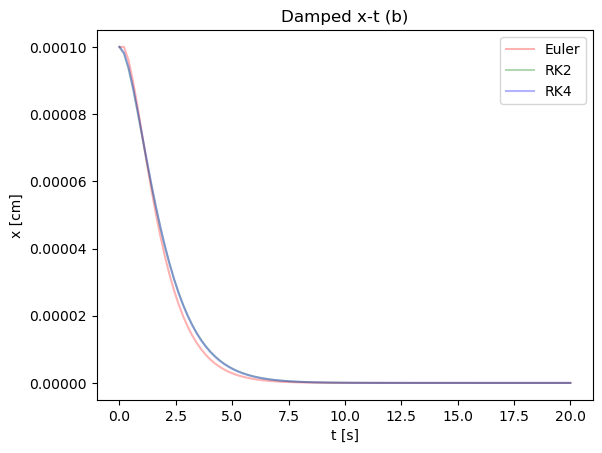

In [14]:
# Visualize
xt(t_eval, sol1, sol2, sol3, "b")

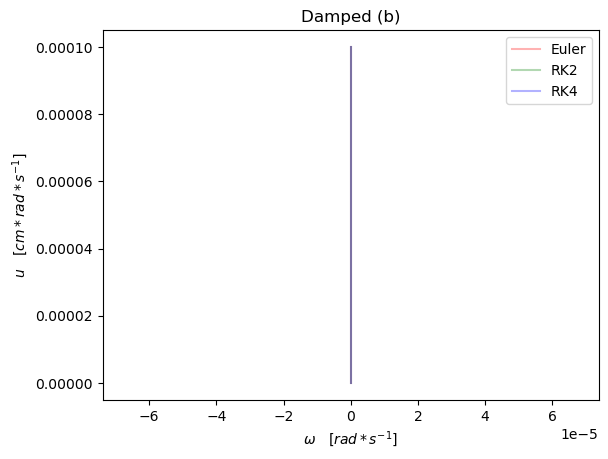

In [15]:
# polar coordinates
u1 = omg1 * sol1
u2 = omg1 * sol2
u3 = omg1 * sol3

w1 = r * sol1 + sol1_v
w2 = r * sol2 + sol2_v
w3 = r * sol3 + sol3_v

# plot it!
plot(u1, u2, u3, w1, w2, w3, "b")

(c) $A = 1 [cm],\quad \omega_0 = 1 [rads^{-1}],\quad \gamma = 1.2 [s^{-1}], \quad \phi = -\pi / 2 [rad]$

In [16]:
# update the parameter \gamma
# Setting parameters
N, t = 100, 20
dt = t/N

M, K = 1, 1
A = 1 # initial amplitude
r  = 1.2 # \gamma
lam = 2 * M * r # \lamda
phi = - np.pi/2
omg0 = np.sqrt(K/M)
omg1 = np.sqrt(abs(np.square(omg0) - np.square(r)))

y0  = np.zeros(2)
y0[0]= 10e-5 # initial position (use tolerence = 10e-5)
y0[1] = - A * r * np.cos(phi) - A * omg1 * np.sin(phi) # initial velocity

t_eval = np.linspace(0, t, N) # from 0 to t divided by N+1, i.e., N+1 equal parts.

In [17]:
# position
sol1 = solver.solve_ivp(oscillator, y0, t, dt, N, method="Euler", args=(lam, K, M))[0]
sol2 = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK2", args=(lam, K, M))[0]
sol3 = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK4", args=(lam, K, M))[0]

# velocity
sol1_v = solver.solve_ivp(oscillator, y0, t, dt, N, method="Euler", args=(lam, K, M))[1]
sol2_v = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK2", args=(lam, K, M))[1]
sol3_v = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK4", args=(lam, K, M))[1]

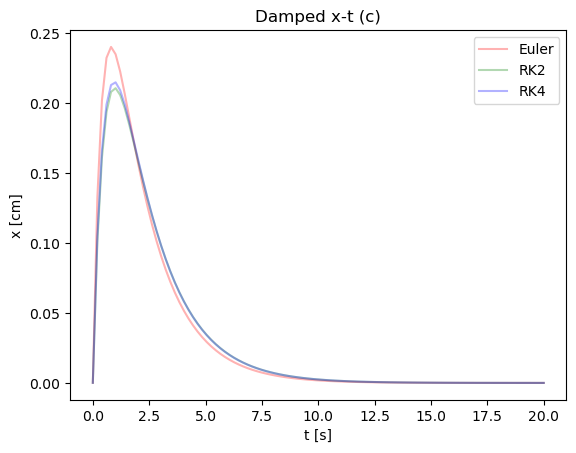

In [18]:
# Visualize
xt(t_eval, sol1, sol2, sol3, "c")

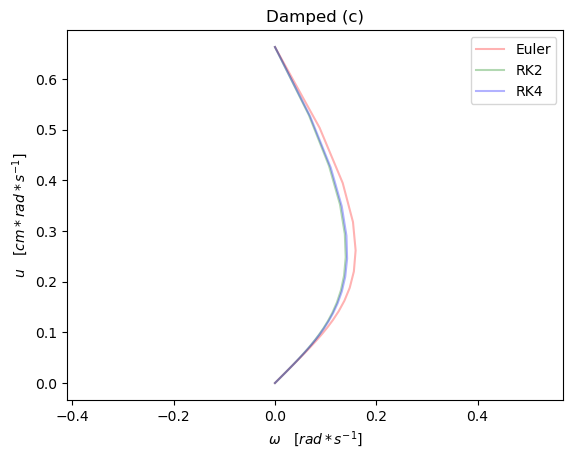

In [19]:
# polar coordinates
u1 = omg1 * sol1
u2 = omg1 * sol2
u3 = omg1 * sol3

w1 = r * sol1 + sol1_v
w2 = r * sol2 + sol2_v
w3 = r * sol3 + sol3_v

# plot it!
plot(u1, u2, u3, w1, w2, w3, "c")